<a href="https://colab.research.google.com/github/yourfriendjacob/js-spring-cs5567/blob/main/cifar10_ccn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

x_train,x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size = 0.2)

y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)
y_test = to_categorical(Y_test, num_classes = 10)

x_train = x_train * 1.0/255

x_val = x_val * 1.0/255

X_test = X_test * 1.0/255

train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False
        )
train_datagen.fit(x_train)


170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')

x train shape: (40000, 32, 32, 3)
y train shape: (40000, 10)


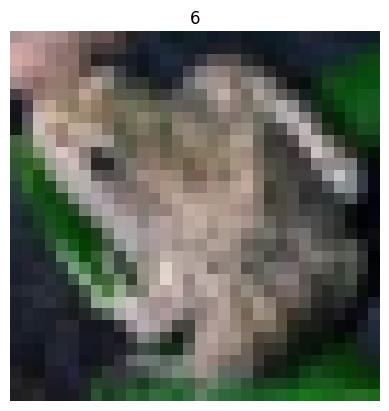

In [4]:
index = 20

test_image = x_train[index]
test_label = np.argmax(y_train[index])
plt.imshow(test_image)
plt.title(test_label)
plt.axis('off')
plt.show()

In [36]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=1e-6)


model = tf.keras.models.Sequential()
model.add(Conv2D(filters = 128, kernel_size= (7, 7), activation = 'sigmoid', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(3, 3))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'tanh'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.004, momentum=.9, nesterov=True)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 128)       18944     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 6, 6, 32)          36896     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 3, 3, 32)          0         
                                                                 
 flatten_12 (Flatten)        (None, 288)             

In [37]:
result = model.fit(
    x_train, y_train,
    batch_size = 100,
    validation_data = (x_val, y_val),
    epochs = 100,
    verbose = 1,
    callbacks = [learning_rate_reduction]
)

Epoch 1/100
400/400 [==============================] - 5s 10ms/step - loss: 2.3031 - accuracy: 0.1038 - val_loss: 2.2937 - val_accuracy: 0.1144 - lr: 0.0040
Epoch 2/100
400/400 [==============================] - 3s 8ms/step - loss: 2.1871 - accuracy: 0.1714 - val_loss: 2.0916 - val_accuracy: 0.2124 - lr: 0.0040
Epoch 3/100
400/400 [==============================] - 4s 9ms/step - loss: 2.0458 - accuracy: 0.2293 - val_loss: 1.9942 - val_accuracy: 0.2565 - lr: 0.0040
Epoch 4/100
400/400 [==============================] - 3s 8ms/step - loss: 1.9594 - accuracy: 0.2704 - val_loss: 1.8923 - val_accuracy: 0.3055 - lr: 0.0040
Epoch 5/100
400/400 [==============================] - 3s 8ms/step - loss: 1.8749 - accuracy: 0.3095 - val_loss: 1.8041 - val_accuracy: 0.3481 - lr: 0.0040
Epoch 6/100
400/400 [==============================] - 4s 10ms/step - loss: 1.7825 - accuracy: 0.3440 - val_loss: 1.7237 - val_accuracy: 0.3784 - lr: 0.0040
Epoch 7/100
400/400 [==============================] - 4s 9ms/

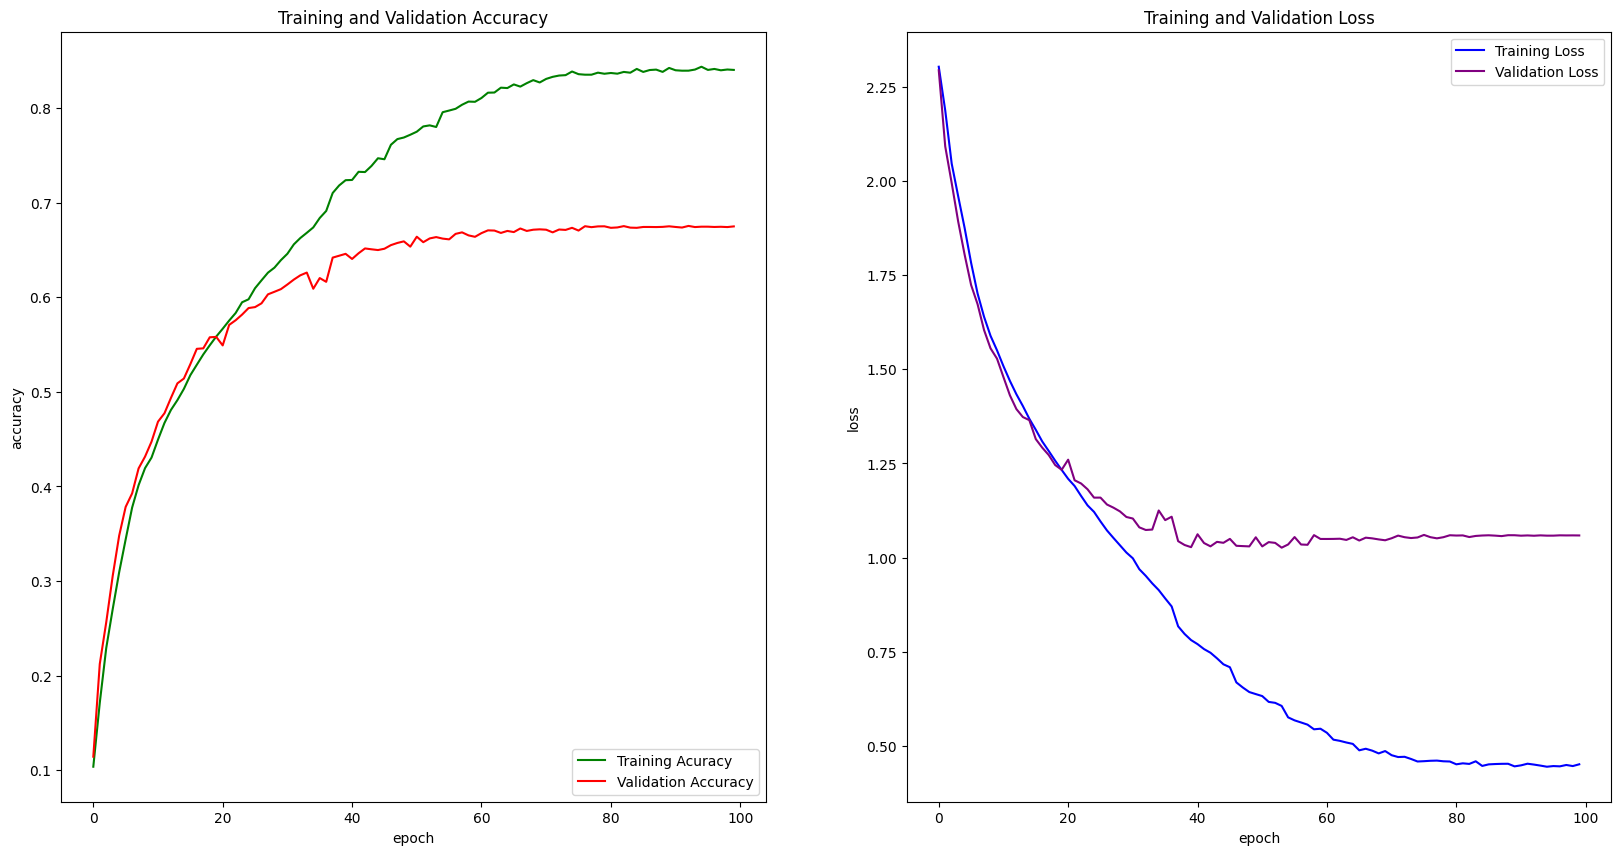

In [38]:
def plot_acc_loss(result):
  # function to plot the accuracy and loss graphs
  acc = result.history['accuracy']
  val_acc = result.history['val_accuracy']
  loss = result.history['loss']
  val_loss = result.history['val_loss']

  plt.figure(figsize=(20, 10))
  plt.subplot(1, 2, 1)
  plt.title("Training and Validation Accuracy")
  plt.plot(acc,color = 'green',label = 'Training Acuracy')
  plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.subplot(1, 2, 2)
  plt.title('Training and Validation Loss')
  plt.plot(loss,color = 'blue',label = 'Training Loss')
  plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(loc='upper right')
  plt.show()


plot_acc_loss(result)

In [32]:
import pandas as pd
hist_df = pd.DataFrame(result.history)
hist_csv_file = '/a_4.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

model.save('/a_4.keras')